In [22]:
import torch
from resnext50 import resnext50
from dataset import TestImageDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]


from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

def calcula_pred(red, dataset, batch_size=100):
    # base = []
    predicciones = []
    dataloader = DataLoader(dataset, batch_size)
    for x, lab in tqdm(dataloader):
        out = red.forward(x)
        _, max_idx = torch.max(out, dim=1)
        predicciones.append(max_idx)
    return predicciones

In [2]:
net = resnext50(img_channel=3, num_classes=19)
net.load_state_dict(torch.load(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Trained\best_ResNext_11.pth'))
net.eval()

ResNext(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BottleneckBlock(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (drop1): Dropout2d(p=0.5, inplace=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
      (drop2): Dropout2d(p=0.5, inplace=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
      (drop3): Dropout2d(p=0.5, inplace=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [3]:
test_dataset = TestImageDataset(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Imagenes\clothing-small', 224, 224)

In [4]:
pr = calcula_pred(red=net, dataset=test_dataset, batch_size=32)

predictions = [j for i in pr for j in i]

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [07:57<00:00,  7.97s/it]


In [18]:
len(pred2)

1900

In [5]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

In [34]:
ground_truth = []
for i in range(len(predictions)):
    ground_truth.append(test_dataset[i][1])

In [35]:
confusion_matrix(ground_truth, predictions)

array([[51,  0,  2, 10,  0,  2,  3,  6,  9,  1,  1,  0,  7,  1,  3,  0,
         2,  0,  2],
       [ 0,  9, 23,  2,  0, 16,  2,  2, 12,  0,  2,  3,  6,  3,  0, 15,
         3,  1,  1],
       [ 0,  1, 34,  3,  0, 13, 12,  2, 10,  0,  2,  3,  5,  1,  1,  9,
         1,  2,  1],
       [ 4,  0,  5, 37,  3,  4,  2,  4, 19,  1,  0,  1,  8,  4,  2,  0,
         4,  0,  2],
       [ 1,  0,  7,  5, 28,  6, 11,  3, 16,  4,  2,  4,  7,  2,  0,  2,
         1,  1,  0],
       [ 1,  3, 18,  3,  4, 26, 11,  1,  7,  3,  2,  3,  6,  3,  0,  5,
         3,  0,  1],
       [ 0,  0, 17,  1,  2, 12, 48,  1,  6,  0,  1,  1,  4,  3,  0,  2,
         2,  0,  0],
       [ 1,  0,  2,  0,  4,  5,  3, 48, 12,  0,  1,  1,  0, 10,  4,  2,
         4,  0,  3],
       [ 0,  0,  1,  1,  0,  0,  0,  1, 86,  0,  0,  0,  1,  5,  0,  0,
         4,  0,  1],
       [ 2,  0,  1,  1,  0,  1,  4,  2, 38, 40,  0,  1,  3,  3,  1,  0,
         1,  2,  0],
       [ 0,  0, 22,  5,  2, 10,  4,  2,  9,  1, 17,  5,  5,  1,  1, 11

In [8]:
data=[]
for i in range(len(predictions)):
    data.append([predictions[i].item(), ground_truth[i]])


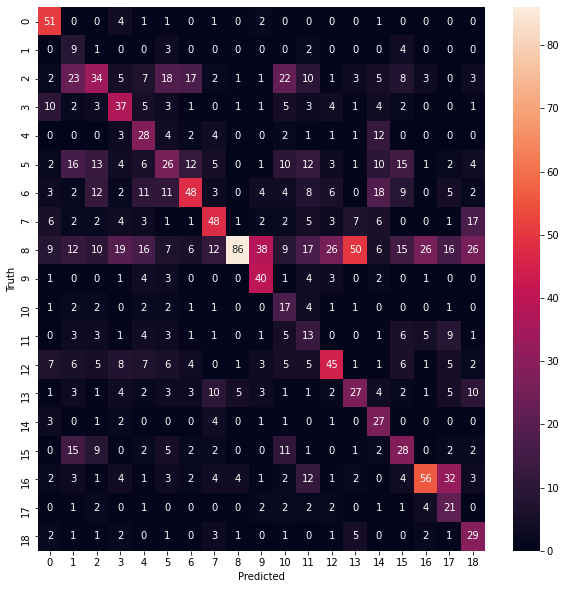

<Figure size 1080x1080 with 0 Axes>

In [9]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

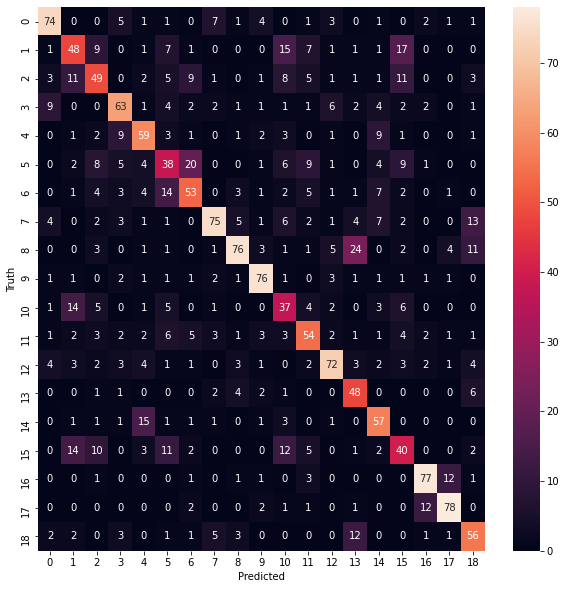

<Figure size 1080x1080 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [47]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

In [12]:
wrong=[]
cont= 0
for i in range(len(predictions)):
    boolean = predictions[i].item()==ground_truth[i]

    if boolean == False:
        wrong.append(i)
    else:
        cont += 1
    



In [26]:
cont/1900 *100

59.473684210526315

In [13]:
cont/1900 *100

35.26315789473684

In [28]:
wrong[0:5]

[2, 8, 9, 12, 13]

In [29]:
g = np.swapaxes(test_dataset[7][0], 0,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


hat 16


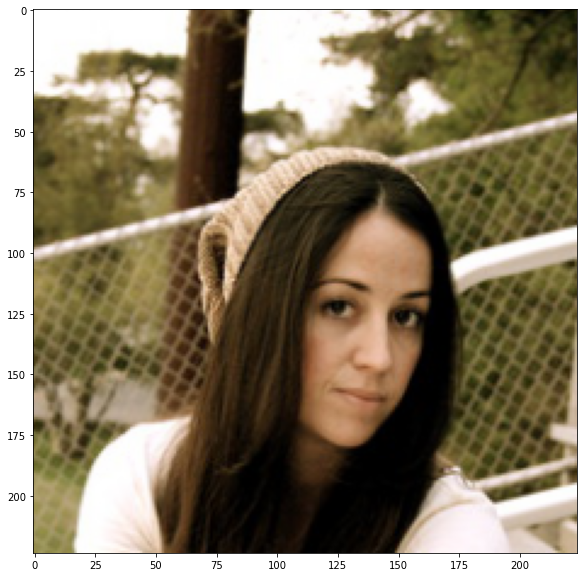

In [32]:
plt.imshow(g)
print(test_dataset.read_mapping()[predictions[7].item()], ground_truth[7])


In [26]:
print(predictions[2].item(),ground_truth[2])

6 15


In [91]:
wrong_class0 = []
cont0 = 0
for i in range(len(predictions)):
    if ground_truth[i] == 0 and predictions[i] == 0:
        cont0 += 1
    elif ground_truth[i] == 0 and predictions[i] != 0:
        wrong_class0.append(i)
        

In [84]:
def contar_veces(elemento, lista):
    veces = 0
    for i in lista:
        if elemento == i:
            veces += 1
    return veces

In [92]:
cont0/contar_veces(0,ground_truth) *100

74.0

In [95]:
wrong_class0[0:5]

[22, 53, 95, 147, 215]

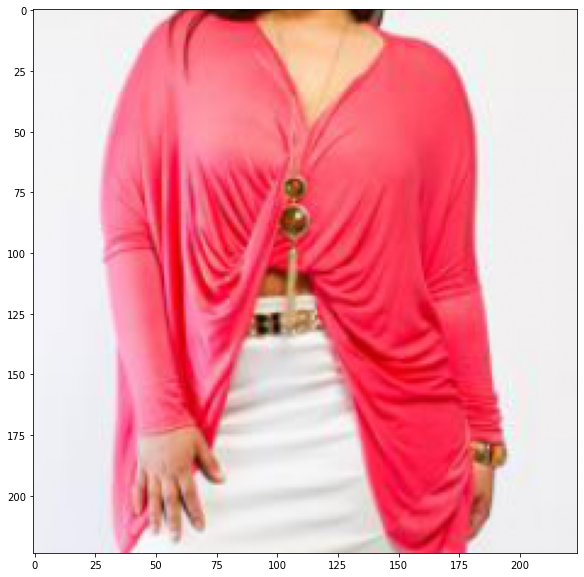

In [27]:
plt.imshow(np.swapaxes(test_dataset[0][0],0,2))

jumper


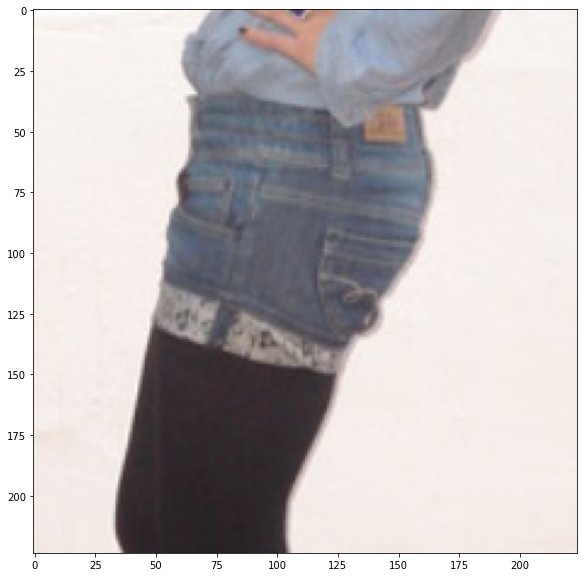

In [28]:
c0 = np.swapaxes(test_dataset[22][0], 0,2)
plt.imshow(c0)
print(test_dataset.read_mapping()[predictions[22].item()])

In [14]:
test_dataset.read_mapping()[0]

'shorts'

In [110]:
test_dataset.read_mapping()[predictions[22].item()]

'sweater'

In [186]:
def classes_wrong(pred,truth):
    errores = []
    accuracies = []
    for i in range(19):
        err = []
        contador = 0
        for j in range(len(predictions)):
            if ground_truth[j] == i and predictions[j] == i:
                contador += 1
            elif ground_truth[j] == i and predictions[j] != i:
                err.append(j)
        accuracies.append(contador / contar_veces(i, ground_truth))
        errores.append(err)
    return errores,accuracies

In [187]:
err, acc = classes_wrong(predictions,ground_truth)

In [188]:
acc

[0.74,
 0.48,
 0.49,
 0.63,
 0.59,
 0.38,
 0.53,
 0.75,
 0.76,
 0.76,
 0.37,
 0.54,
 0.72,
 0.48,
 0.57,
 0.4,
 0.77,
 0.78,
 0.56]

In [189]:
err[0]

[22,
 53,
 95,
 147,
 215,
 281,
 282,
 412,
 431,
 473,
 480,
 721,
 811,
 823,
 836,
 982,
 1072,
 1150,
 1209,
 1238,
 1317,
 1336,
 1411,
 1452,
 1636,
 1662]

In [33]:
test_dataset.read_mapping()

{0: 'shorts',
 1: 'jackets_parka',
 2: 'sweater',
 3: 'skirts',
 4: 'dress',
 5: 'blouse_shirts',
 6: 'tee',
 7: 'pants',
 8: 'shoes',
 9: 'belt',
 10: 'coat',
 11: 'scarf',
 12: 'bag',
 13: 'socks',
 14: 'jumper',
 15: 'blazer',
 16: 'hat',
 17: 'glasses',
 18: 'tights'}

In [39]:
print(predictions[0:10],ground_truth[0:10])

[tensor(5), tensor(6), tensor(6), tensor(15), tensor(0), tensor(18), tensor(7), tensor(16), tensor(4), tensor(18)] [5, 9, 15, 15, 0, 18, 18, 16, 14, 7]


In [181]:
hoal

[[2, 3], [4, 5]]

In [ ]:
net.forward()